#Task 8: Тепловая карта (heatmap)

В этом упражнении давайте выясним, существуют ли закономерности в поведении пользователей в разные дни недели и часы.
1.	Анализируйте только пользователей, а не администраторов.
2.	Используйте фильтр status = 'ready' для коммитов.
3.	Разрешается выбрать цветовую палитру по своему вкусу для обоих графиков, которые вы построите в этом упражнении.
4.	Используйте таблицу checker для вашего запроса.
5.	Используйте абсолютные исходные, а не средние значения числа коммитов.
6.	Отсортируйте датафреймы по общему числу коммитов, сделанных пользователем.
7.	В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопросы (ответьте на них, глядя только на графики):
o	«У какого пользователя больше всего коммитов во вторник?». Ответ: user_*.
o	«У какого пользователя больше всего коммитов в четверг?». Ответ: user_*.
o	«В какой будний день пользователи не любят делать много коммитов?». Ответ (в качестве примера): понедельник.
o	«Какой пользователь в каком часу сделал наибольшее количество коммитов?». Ответ (в качестве примера): user_1, 15.
8.	Выполните необходимые шаги по созданию следующих двух графиков:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sqlite3 import connect

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [6]:
dataset8= pd.read_sql('''
select timestamp,date(timestamp) date,uid as user
from checker
where uid like '%user%' and status = 'ready' 
''', con,parse_dates=['timestamp'])
dataset8

,timestamp,date,user
0,2020-04-17 05:19:02.744528,2020-04-17,user_4
1,2020-04-17 05:22:45.549397,2020-04-17,user_4
2,2020-04-17 05:34:24.422370,2020-04-17,user_4
3,2020-04-17 05:43:27.773992,2020-04-17,user_4
4,2020-04-17 05:46:32.275104,2020-04-17,user_4
...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,user_19
1682,2020-05-21 20:18:54.487900,2020-05-21,user_1
1683,2020-05-21 20:19:06.872761,2020-05-21,user_1
1684,2020-05-21 20:22:41.877806,2020-05-21,user_1


In [7]:
dataset8['hours'] =dataset8.timestamp.dt.hour
#dataset8['day_of_week'] = dataset8.timestamp. dt.day_name ()
dataset8

,timestamp,date,user,hours
0,2020-04-17 05:19:02.744528,2020-04-17,user_4,5
1,2020-04-17 05:22:45.549397,2020-04-17,user_4,5
2,2020-04-17 05:34:24.422370,2020-04-17,user_4,5
3,2020-04-17 05:43:27.773992,2020-04-17,user_4,5
4,2020-04-17 05:46:32.275104,2020-04-17,user_4,5
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,user_19,20
1682,2020-05-21 20:18:54.487900,2020-05-21,user_1,20
1683,2020-05-21 20:19:06.872761,2020-05-21,user_1,20
1684,2020-05-21 20:22:41.877806,2020-05-21,user_1,20


In [8]:
dataset8['day_of_week'] = dataset8.timestamp.dt.weekday

In [9]:
dataset8

,timestamp,date,user,hours,day_of_week
0,2020-04-17 05:19:02.744528,2020-04-17,user_4,5,4
1,2020-04-17 05:22:45.549397,2020-04-17,user_4,5,4
2,2020-04-17 05:34:24.422370,2020-04-17,user_4,5,4
3,2020-04-17 05:43:27.773992,2020-04-17,user_4,5,4
4,2020-04-17 05:46:32.275104,2020-04-17,user_4,5,4
...,...,...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,user_19,20,3
1682,2020-05-21 20:18:54.487900,2020-05-21,user_1,20,3
1683,2020-05-21 20:19:06.872761,2020-05-21,user_1,20,3
1684,2020-05-21 20:22:41.877806,2020-05-21,user_1,20,3


In [10]:
dataset8.drop(columns='date', axis=1, inplace=True)
dataset8

,timestamp,user,hours,day_of_week
0,2020-04-17 05:19:02.744528,user_4,5,4
1,2020-04-17 05:22:45.549397,user_4,5,4
2,2020-04-17 05:34:24.422370,user_4,5,4
3,2020-04-17 05:43:27.773992,user_4,5,4
4,2020-04-17 05:46:32.275104,user_4,5,4
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,user_19,20,3
1682,2020-05-21 20:18:54.487900,user_1,20,3
1683,2020-05-21 20:19:06.872761,user_1,20,3
1684,2020-05-21 20:22:41.877806,user_1,20,3


подготовим датасет с днями недели

In [11]:
df_week = dataset8.copy()
df_week.drop(columns='hours', axis=1, inplace=True)
df_week

,timestamp,user,day_of_week
0,2020-04-17 05:19:02.744528,user_4,4
1,2020-04-17 05:22:45.549397,user_4,4
2,2020-04-17 05:34:24.422370,user_4,4
3,2020-04-17 05:43:27.773992,user_4,4
4,2020-04-17 05:46:32.275104,user_4,4
...,...,...,...
1681,2020-05-21 20:01:48.959966,user_19,3
1682,2020-05-21 20:18:54.487900,user_1,3
1683,2020-05-21 20:19:06.872761,user_1,3
1684,2020-05-21 20:22:41.877806,user_1,3


In [12]:
df = df_week.groupby(by=['user', 'day_of_week'], as_index=False).agg({'timestamp': 'count'}).rename(columns={'timestamp': 'commits'})
df

,user,day_of_week,commits
0,user_0,0,2
1,user_1,2,1
2,user_1,3,20
3,user_1,5,1
4,user_1,6,24
...,...,...,...
132,user_7,1,3
133,user_7,2,2
134,user_8,3,8
135,user_8,5,25


In [13]:
df = pd.pivot(df, index='user', columns='day_of_week', values='commits').fillna(0)
df

day_of_week,0,1,2,3,4,5,6
user,,,,,,,
user_0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
user_1,0.0,0.0,1.0,20.0,0.0,1.0,24.0
user_10,0.0,9.0,19.0,38.0,1.0,3.0,1.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,5.0
user_12,1.0,1.0,0.0,4.0,0.0,4.0,39.0
user_13,2.0,29.0,0.0,2.0,0.0,15.0,12.0
user_14,25.0,44.0,0.0,9.0,0.0,41.0,13.0
user_15,0.0,0.0,0.0,3.0,0.0,3.0,11.0
user_16,6.0,3.0,0.0,7.0,0.0,0.0,16.0


In [14]:
df['total'] = df.sum(axis=1)
df

day_of_week,0,1,2,3,4,5,6,total
user,,,,,,,,
user_0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
user_1,0.0,0.0,1.0,20.0,0.0,1.0,24.0,46.0
user_10,0.0,9.0,19.0,38.0,1.0,3.0,1.0,71.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
user_12,1.0,1.0,0.0,4.0,0.0,4.0,39.0,49.0
user_13,2.0,29.0,0.0,2.0,0.0,15.0,12.0,60.0
user_14,25.0,44.0,0.0,9.0,0.0,41.0,13.0,132.0
user_15,0.0,0.0,0.0,3.0,0.0,3.0,11.0,17.0
user_16,6.0,3.0,0.0,7.0,0.0,0.0,16.0,32.0


In [15]:
df = df.sort_values('total', ascending=False)\
    .drop(columns='total')\
    .transpose()\
    .fillna(0)
df.sort_index(inplace=True)
df

user,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,18.0,25.0,12.0,8.0,4.0,0.0,12.0,3.0,0.0,23.0,...,4.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
1,43.0,44.0,67.0,22.0,5.0,1.0,0.0,0.0,9.0,6.0,...,2.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
2,17.0,0.0,16.0,8.0,0.0,17.0,4.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
3,54.0,9.0,2.0,20.0,40.0,26.0,48.0,5.0,38.0,5.0,...,10.0,7.0,8.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0
4,32.0,0.0,0.0,6.0,5.0,1.0,4.0,18.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,41.0,17.0,33.0,11.0,10.0,2.0,45.0,3.0,2.0,...,18.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
6,24.0,13.0,7.0,23.0,26.0,35.0,16.0,4.0,1.0,5.0,...,0.0,16.0,15.0,11.0,5.0,1.0,5.0,0.0,0.0,0.0


In [16]:
df.rename(index={0:'Mon',1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)

In [17]:
final = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

подготовим датасет по часам

In [18]:
df_hour = dataset8.copy()
df_hour.drop(columns='day_of_week', axis=1, inplace=True)
df_hour

,timestamp,user,hours
0,2020-04-17 05:19:02.744528,user_4,5
1,2020-04-17 05:22:45.549397,user_4,5
2,2020-04-17 05:34:24.422370,user_4,5
3,2020-04-17 05:43:27.773992,user_4,5
4,2020-04-17 05:46:32.275104,user_4,5
...,...,...,...
1681,2020-05-21 20:01:48.959966,user_19,20
1682,2020-05-21 20:18:54.487900,user_1,20
1683,2020-05-21 20:19:06.872761,user_1,20
1684,2020-05-21 20:22:41.877806,user_1,20


In [19]:
df_h = df_hour.groupby(by=['user', 'hours'], as_index=False).agg({'timestamp': 'count'}).rename(columns={'timestamp': 'commits'})
df_h

,user,hours,commits
0,user_0,17,2
1,user_1,12,1
2,user_1,16,1
3,user_1,17,5
4,user_1,19,11
...,...,...,...
302,user_8,16,7
303,user_8,17,4
304,user_8,19,4
305,user_8,20,1


In [20]:
df_h = pd.pivot(df_h, index='user', columns='hours', values='commits').fillna(0)
df_h

hours,0,1,3,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
user,,,,,,,,,,,,,,,,,,,,,
user_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,5.0,0.0,11.0,19.0,8.0,1.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,2.0,...,3.0,0.0,8.0,6.0,3.0,15.0,13.0,12.0,1.0,0.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
user_12,0.0,0.0,1.0,0.0,0.0,0.0,6.0,5.0,5.0,6.0,...,4.0,1.0,2.0,6.0,1.0,2.0,0.0,2.0,0.0,0.0
user_13,0.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0,4.0,2.0,...,0.0,2.0,1.0,4.0,5.0,8.0,5.0,1.0,3.0,1.0
user_14,2.0,3.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,1.0,...,1.0,13.0,6.0,20.0,14.0,12.0,13.0,17.0,11.0,6.0
user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,3.0,7.0,1.0,0.0,0.0
user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,0.0,0.0,0.0,2.0,11.0,6.0,4.0,0.0


In [21]:
df_h['total'] = df_h.sum(axis=1)
df_h

hours,0,1,3,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,total
user,,,,,,,,,,,,,,,,,,,,,
user_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,0.0,11.0,19.0,8.0,1.0,0.0,46.0
user_10,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,2.0,...,0.0,8.0,6.0,3.0,15.0,13.0,12.0,1.0,0.0,71.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,5.0
user_12,0.0,0.0,1.0,0.0,0.0,0.0,6.0,5.0,5.0,6.0,...,1.0,2.0,6.0,1.0,2.0,0.0,2.0,0.0,0.0,49.0
user_13,0.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0,4.0,2.0,...,2.0,1.0,4.0,5.0,8.0,5.0,1.0,3.0,1.0,60.0
user_14,2.0,3.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,1.0,...,13.0,6.0,20.0,14.0,12.0,13.0,17.0,11.0,6.0,132.0
user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,3.0,3.0,7.0,1.0,0.0,0.0,17.0
user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,11.0,6.0,4.0,0.0,32.0


In [22]:
df_h = df_h.sort_values('total', ascending=False)\
    .drop(columns='total')\
    .transpose()\
    .fillna(0)
df_h.sort_index(inplace=True)
df_h

user,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hours,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,2.0,7.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
10,13.0,1.0,21.0,9.0,11.0,8.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


построим тепловую карту по дням недели

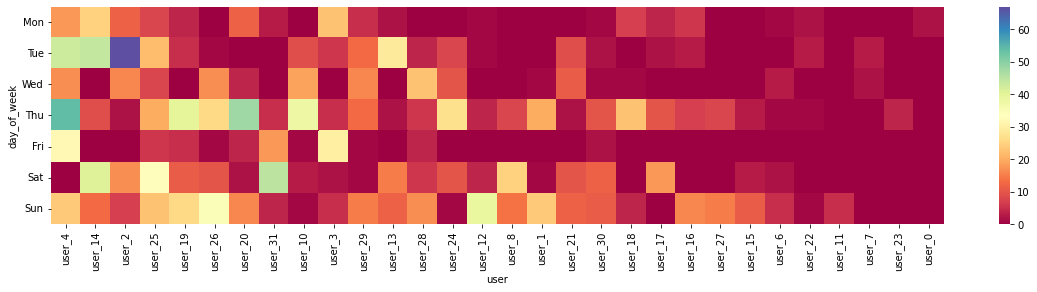

In [23]:
y_labels = [i[:3] for i in final]

fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(df, ax=ax, cmap='Spectral', yticklabels =  y_labels)
plt.yticks(rotation=0)
plt.show()

постоим тепловую карту по часам

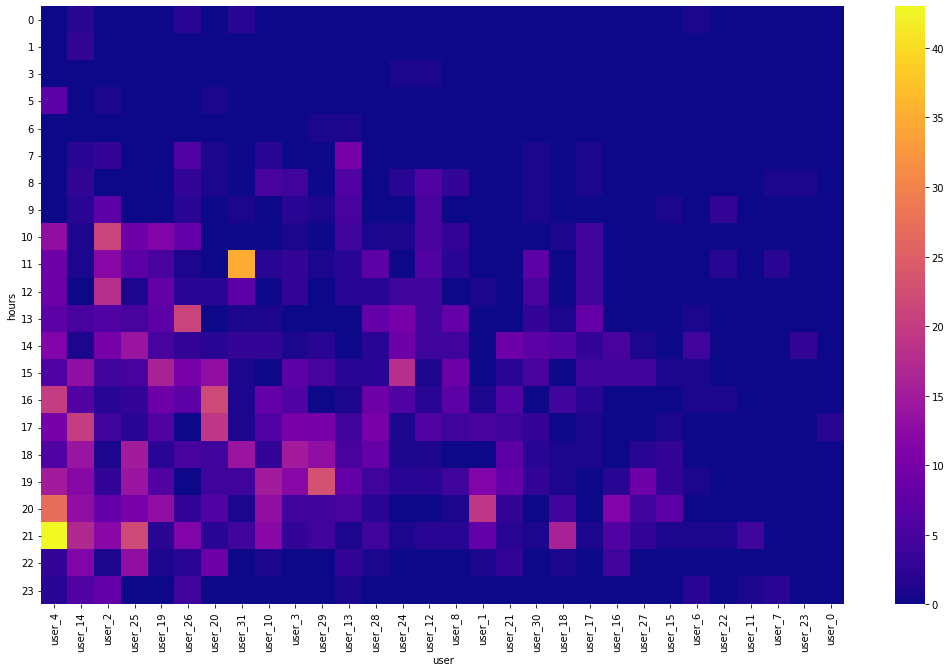

In [24]:
fig, ax = plt.subplots(figsize=(18, 11))
sns.heatmap(df_h, ax=ax, cmap='plasma')
plt.yticks(rotation=0)
plt.show()

In [25]:
#@markdown **У какого пользователя больше всего коммитов во вторник?**

Ответ: User_2

In [26]:
#@markdown **У какого пользователя больше всего коммитов в четверг?**

Ответ: User_4

In [27]:
#@markdown **В какой будний день пользователи не любят делать много коммитов?**

Ответ: Пятница

In [28]:
#@markdown **Какой пользователь в каком часу сделал наибольшее количество коммитов?**

Ответ: user_4, 21

In [29]:
con.close()